In [217]:
import pandas as pd
import numpy as np

In [218]:
medical_df = pd.read_csv("medical-charges.csv") 

In [219]:
medical_df.shape

(1338, 7)

In [220]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [221]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [222]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline


In [223]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size' ]= 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [224]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [225]:
fig = px.histogram(medical_df,
                    x='age',
                    marginal='box',
                    nbins=47,
                    title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [226]:
fig = px.histogram(medical_df,
                    x='bmi',
                    marginal='box',
                    color_discrete_sequence = ['red'],
                    title='Distribution of BMI')
fig.update_layout(bargap=0.1)
fig.show()

In [227]:
fig = px.histogram(medical_df,
                    x='charges',
                    marginal='box',
                    color='smoker',
                    color_discrete_sequence = ['green','grey'],
                    title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [228]:
fig = px.histogram(medical_df,
                    x='charges',
                    marginal='box',
                    color='sex',
                    color_discrete_sequence = ['yellowgreen','blue'],
                    title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [229]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [230]:
px.histogram(medical_df,x='smoker',color='sex',title='Smoker')

In [231]:
px.histogram(medical_df, x='sex', color='children', title='children')


In [232]:
fig = px.scatter(medical_df,
                x = 'age',
                y = 'charges',
                color = 'smoker',
                opacity = 0.8,
                hover_data = ['sex'],
                title = 'Age vs Charges')
fig.update_traces(marker_size = 5)
fig.show()

In [233]:
fig = px.violin(medical_df,
                 x='smoker',
                 y='charges',
                 color='sex',
                #  opacity=0.8,
                 hover_data='sex',
                 title='Violin')
fig.update_traces(marker_size=5)
fig.show()

In [234]:
px.violin(medical_df,x='children',y='charges')


<Axes: xlabel='children', ylabel='charges'>

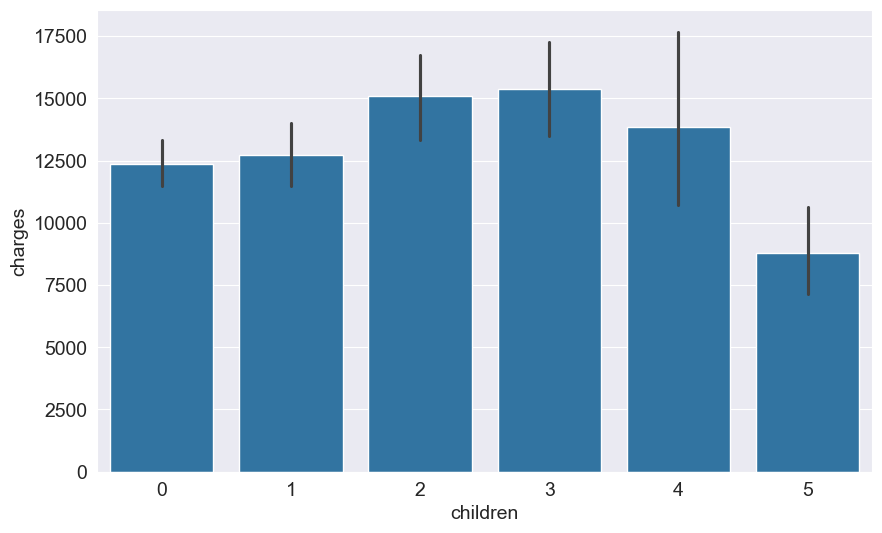

In [235]:
sns.barplot(data=medical_df,x='children',y='charges')

In [236]:
print(medical_df.charges.corr(medical_df.age))
print(medical_df.charges.corr(medical_df.bmi))


0.2990081933306478
0.19834096883362887


In [237]:
smoker_values={'no':0,'yes':1}
smoker_numeric=medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

0.7872514304984778

In [238]:
medical_df[['age','bmi','children','charges']].corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

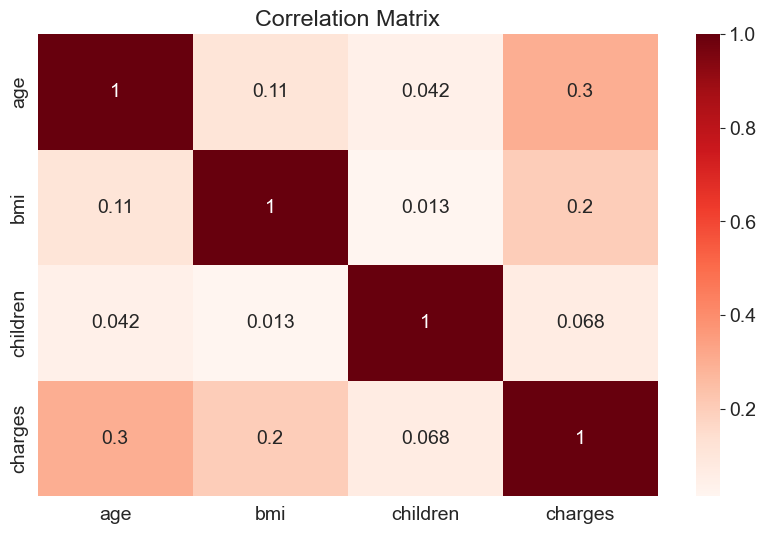

In [239]:
sns.heatmap(medical_df[['age','bmi','children','charges']].corr(),cmap='Reds',annot=True)
plt.title('Correlation Matrix')

# Linear Regression using 1 Variable

In [240]:
non_smoker_df = medical_df[medical_df.smoker == 'no']


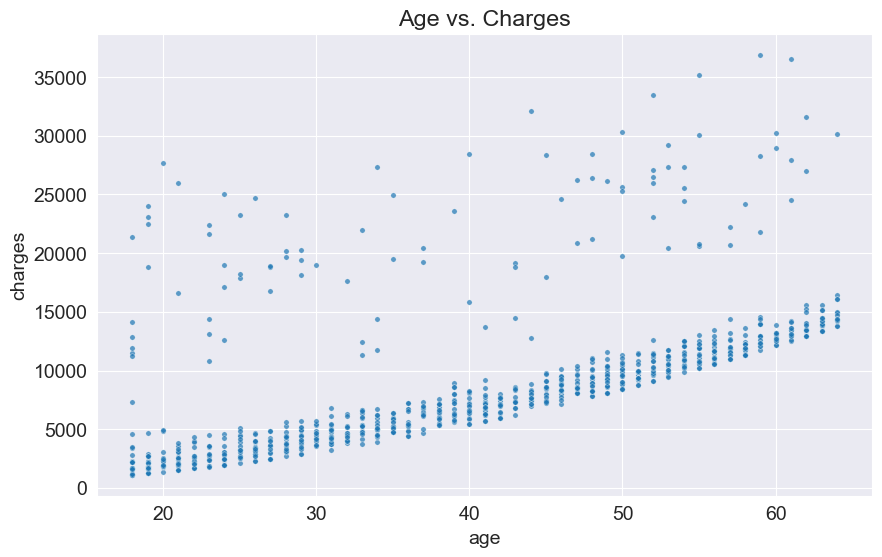

In [241]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15);

### Linear regression equation

In [242]:
def estimate_charges(age, w, b):
    return ((w * age) + b)

In [243]:
w = 50
b = 100

In [244]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)

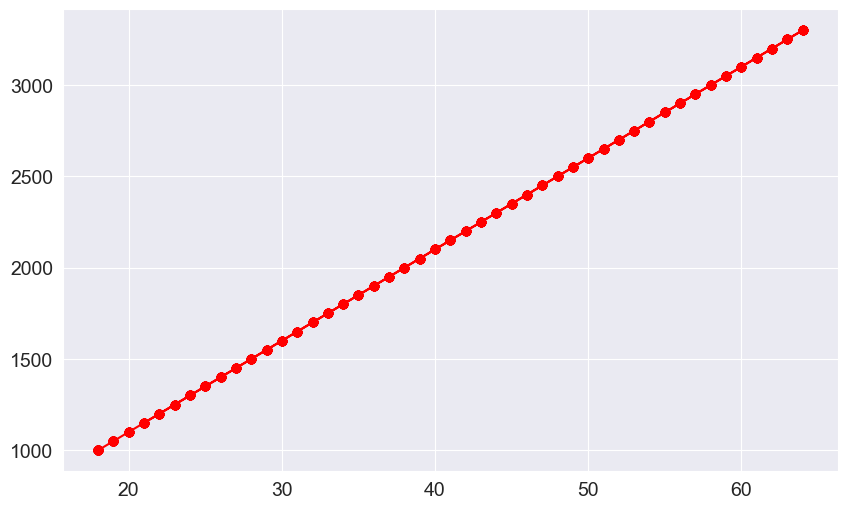

In [245]:
plt.plot(ages,estimated_charges,'r-o');
plt.xlabel='Ages'
plt.ylabel='Estimated Charges'

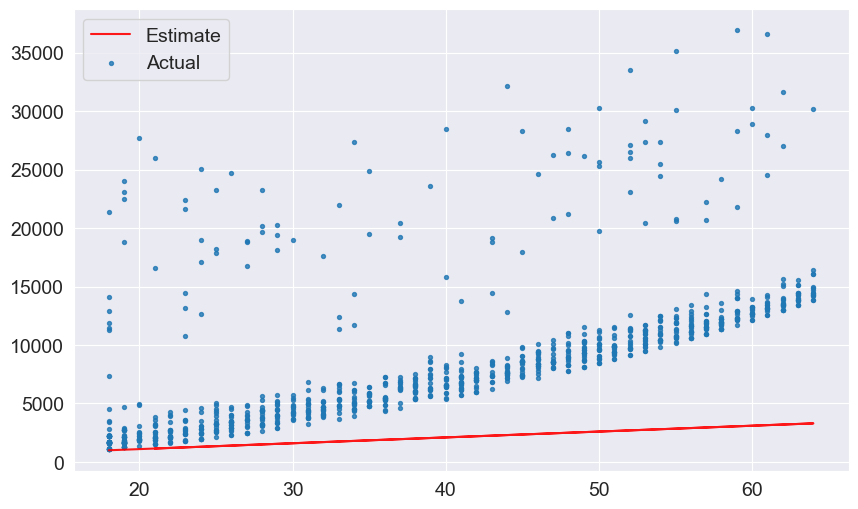

In [246]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8,alpha=0.8);
plt.legend(['Estimate', 'Actual']);



In [247]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    
    estimated_charges = estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    
    plt.legend(['Estimate', 'Actual']);


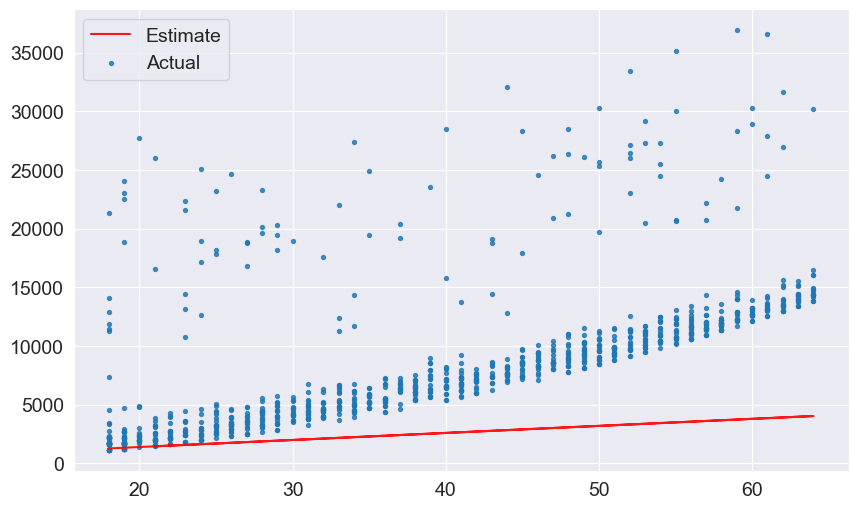

In [248]:
try_parameters(60, 200)

In [249]:
def rmse(targets,predictions):
    return np.sqrt(np.mean(np.square(predictions-targets)))  

In [250]:
w=50
b=100

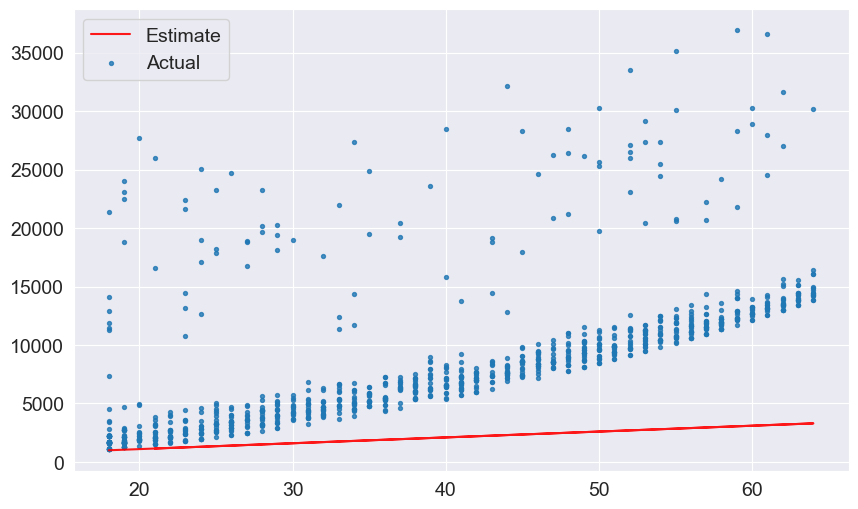

In [251]:
try_parameters(w, b)

In [252]:
targets=non_smoker_df['charges']
predicted=estimate_charges(non_smoker_df.age,w,b)

In [253]:
rmse(targets, predicted)


8461.949562575493

In [254]:
def try_parameters(w,b):
    ages=non_smoker_df.age 
    target=non_smoker_df.charges 
    predictions=estimate_charges(ages,w,b)

    plt.plot(ages,predictions,'r',alpha=0.9);
    plt.scatter(ages,target,s=8,alpha=0.8);

    plt.legend(['Prediction','Actual']);

    loss=rmse(target,predictions)
    print("RMSE Loss: ", loss)



RMSE Loss:  8461.949562575493


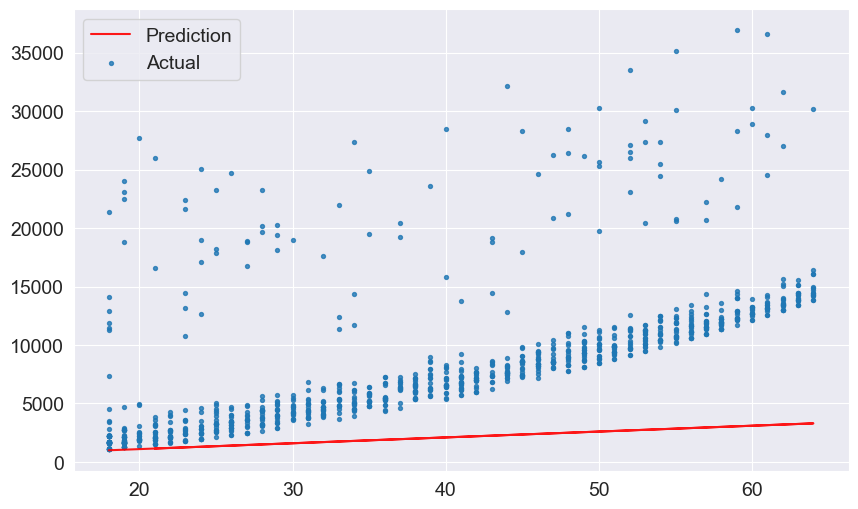

In [255]:
try_parameters(50, 100)


In [256]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [257]:
inputs=non_smoker_df[['age']]
targets=non_smoker_df.charges

In [258]:
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)

inputs.shape : (1064, 1)
targes.shape : (1064,)


In [259]:
model.fit(inputs, targets)


LinearRegression()

In [260]:
model.predict(np.array([[23], 
                        [37], 
                        [61]]))


c:\Users\jimv6\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [261]:
predictions = model.predict(inputs)
predictions


array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [262]:
rmse(targets, predictions)


4662.505766636395

In [263]:
print(model.coef_)
print(model.intercept_)



[267.24891283]
-2091.4205565650864


RMSE Loss:  4662.505766636395


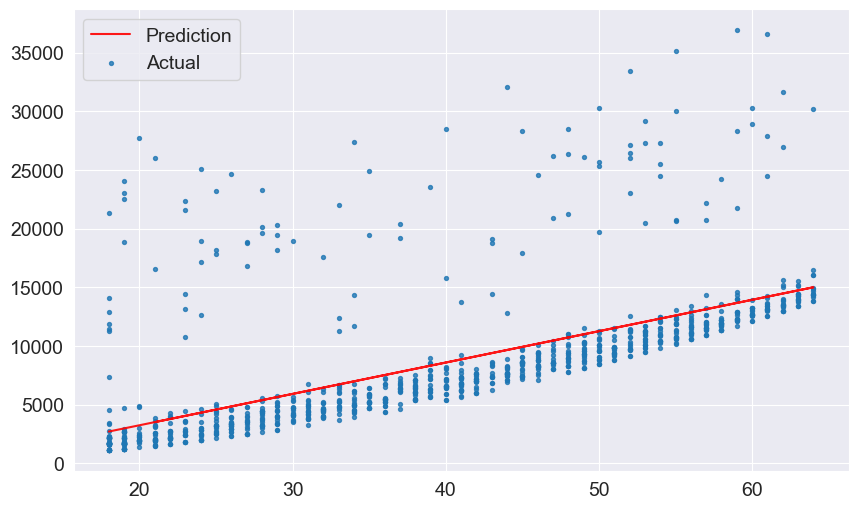

In [264]:
try_parameters(model.coef_, model.intercept_)


In [265]:
from sklearn.linear_model import SGDRegressor
model=SGDRegressor()

In [266]:
inputs=non_smoker_df[['age']]
targets=non_smoker_df.charges

model.fit(inputs, targets)


SGDRegressor()

In [267]:
predictions = model.predict(inputs)
predictions


array([1781.53835788, 4636.17051623, 6063.4865954 , ..., 1781.53835788,
       1781.53835788, 2637.92800539])

In [268]:
print(rmse(targets, predictions))
print(model.coef_)
print(model.intercept_)



4701.596234764552
[285.46321583]
[-3356.79952714]


RMSE Loss:  4701.596234764552


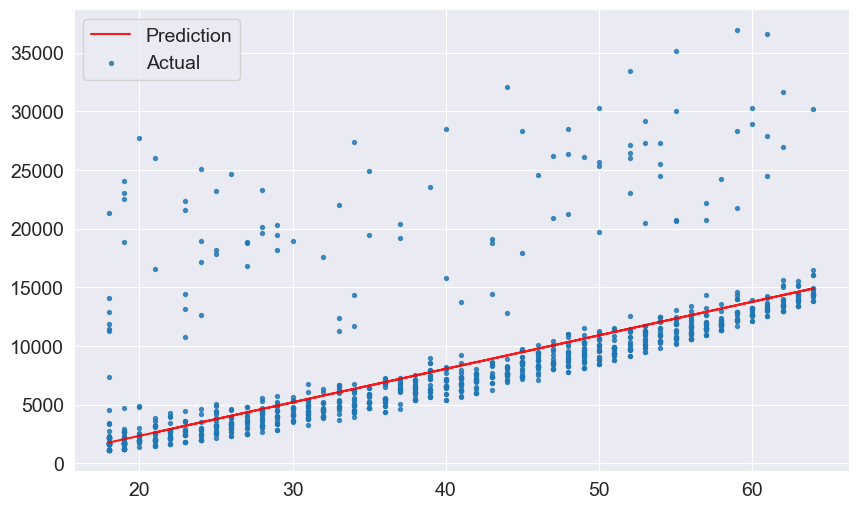

In [269]:
try_parameters(model.coef_, model.intercept_)


# Multivariate Linear Regression 

In [270]:
inputs,targets = non_smoker_df[['age','bmi']],non_smoker_df['charges']

model=LinearRegression().fit(inputs,targets)

predictions=model.predict(inputs)

loss=rmse(targets,predictions)

print(loss)


4662.3128354612945


In [271]:
non_smoker_df.charges.corr(non_smoker_df.bmi)


0.08403654312833271

In [272]:
fig = px.scatter(non_smoker_df,x='bmi',y='charges',title='BMI vs Charges')
fig.update_traces(marker_size=5)
fig.show()

In [273]:
fig = px.scatter_3d(non_smoker_df,x='age',y='bmi',z='charges')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()

In [274]:
print(model.coef_)
print(model.intercept_)

[266.87657817   7.07547666]
-2293.6320906488727


In [275]:
non_smoker_df.charges.corr(non_smoker_df['children'])

0.13892870453542205

In [276]:
fig = px.strip(non_smoker_df,x='children',y='charges',title='Children vs Charges')
fig.update_traces(marker_size=5,marker_opacity=0.5)
fig.show()

In [277]:
inputs,targets=non_smoker_df[['age','bmi','children']],non_smoker_df['charges']
model=LinearRegression().fit(inputs,targets)
predictions=model.predict(inputs)


In [278]:
loss=rmse(targets,predictions)
print(loss)

4608.470405038246


In [279]:
smoker_df=medical_df[medical_df.smoker=='yes']

In [280]:
inputs, targets = smoker_df[['age', 'bmi', 'children']], smoker_df['charges']


model = LinearRegression().fit(inputs, targets)


predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 5718.202480524154


In [281]:
fig=px.scatter_3d(smoker_df,x='age',y='bmi',z='charges')
fig.update_traces(marker_size=4,marker_opacity=0.7)
fig.show()

# Categorical  variables in Linear Regression

<Axes: xlabel='smoker', ylabel='charges'>

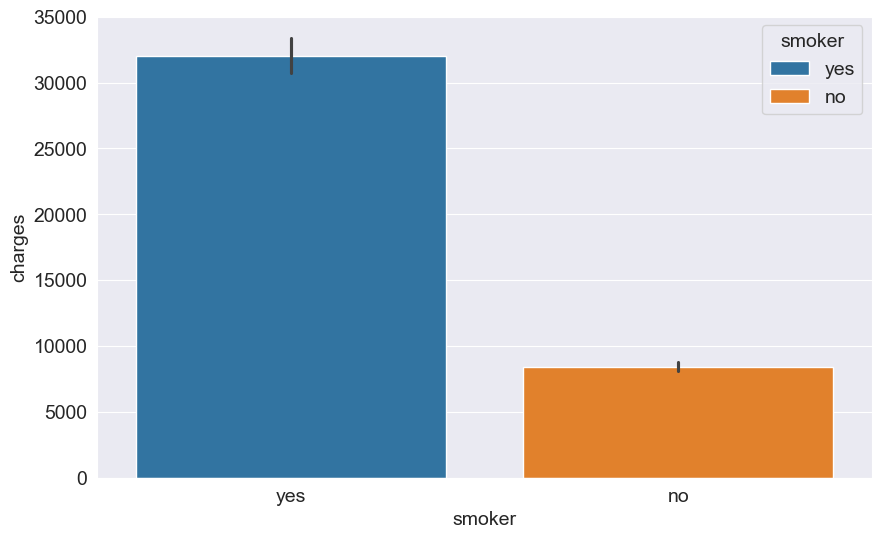

In [282]:
sns.barplot(data=medical_df, x='smoker', y='charges',hue='smoker',legend=True)


<Axes: xlabel='smoker', ylabel='charges'>

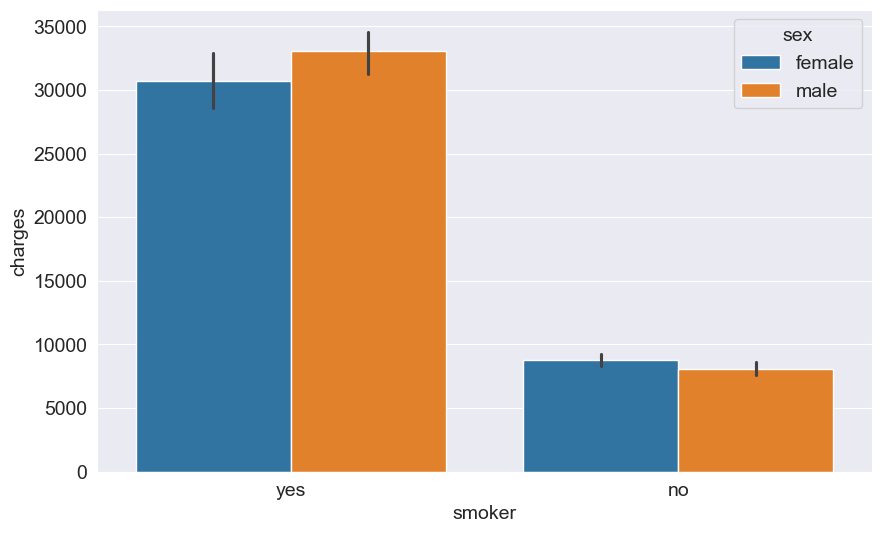

In [283]:
sns.barplot(data=medical_df,x='smoker',y='charges',hue='sex',legend=True)

In [284]:
smoker_codes={'yes':1,'no':0}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

In [285]:
medical_df.charges.corr(medical_df.smoker_code)

0.7872514304984778

In [286]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [287]:
inputs,target= medical_df[['age','bmi','children','smoker_code']],medical_df['charges']
model=LinearRegression().fit(inputs,target)
predictions=model.predict(inputs)
loss=rmse(target,predictions)
print("Loss: ",loss)


Loss:  6056.439217188081


<Axes: xlabel='sex', ylabel='charges'>

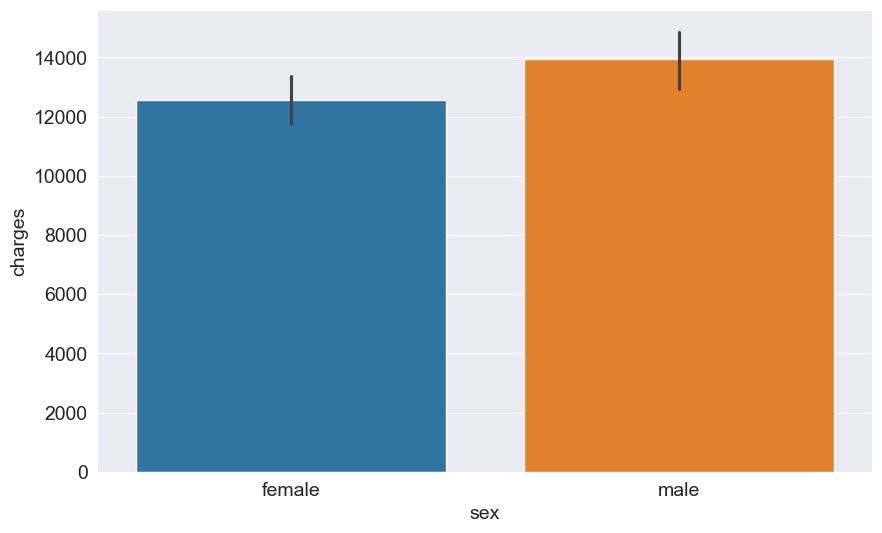

In [288]:
sns.barplot(data=medical_df, x='sex', y='charges',hue='sex')


In [289]:
sex_codes = {'female': 0, 'male': 1}
medical_df['sex_code'] = medical_df.sex.map(sex_codes)
medical_df.charges.corr(medical_df.sex_code)


0.05729206220202533

In [290]:
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], medical_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.100708754546


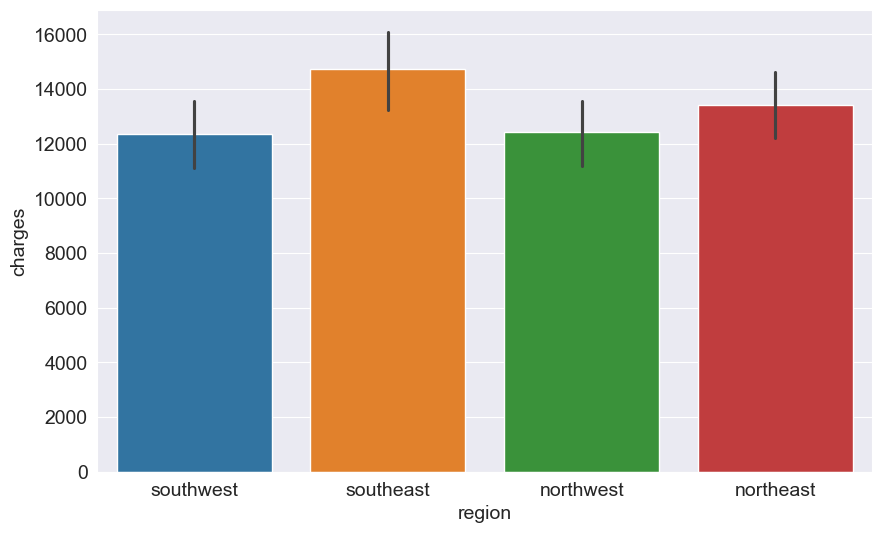

In [291]:
sns.barplot(data=medical_df, x='region', y='charges',hue='region');


In [292]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [293]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [294]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot


In [295]:
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']


In [296]:
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)


In [297]:
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


# Model Improvement

In [298]:
model.coef_


array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [299]:
model.intercept_


-12525.54781119545

In [300]:
weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


## Scaling with StandardScaler

In [301]:
from sklearn.preprocessing import StandardScaler


In [302]:
numeric_cols = ['age', 'bmi', 'children'] 
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [303]:
print("Mean: ",scaler.mean_)
print("Variance: ",scaler.var_)


Mean:  [39.20702541 30.66339686  1.09491779]
Variance:  [197.25385199  37.16008997   1.45212664]


In [304]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs


array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [305]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values

In [306]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = medical_df.charges

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.679651174452


## Finding weights for all features

In [307]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


Smoker, Age and BMI are most significant

# Creating a test set

In [308]:
from sklearn.model_selection import train_test_split
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)


In [309]:
model = LinearRegression().fit(inputs_train, targets_train)

predictions_test = model.predict(inputs_test)


loss = rmse(targets_test, predictions_test)
print('Test Loss:', loss)

Test Loss: 5125.85543641782


In [310]:
predictions_train = model.predict(inputs_train)
loss = rmse(targets_train, predictions_train)
print('Training Loss:', loss)

Training Loss: 6137.179501511302
